<center> <H1>EE 610: Assignment 2 </H1></center>
<center> <H2>Name: Vinit Awale</H2></center>
<center> <H2>Roll No. 18D070067</H2></center>

## IMPORTS

In [222]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch

## Hyperparameters

In [223]:
size = 321

## Question 2
### Part a)

We select the largest window size W = 13

In [224]:
W = 23


### Part b)

We use the following blur kernels of size W = 13
- simple blur kernel
- gaussian blur kernel
- median blur kernel

In [225]:
blurs = [cv2.blur , cv2.GaussianBlur]

In [226]:
kernel_sizes = [1,3,5,7,9]

The noise models that we use are the following:
- Gaussian noise with mean 0 
- Salt and pepper noise with probability 0.05

In [234]:
Gaussian_noise = np.random.normal(0, 0.1, (size,size,3))*20
Salt_and_pepper_noise = np.random.randint(-1, 2, (size,size,3))*10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Gaussian Noise')

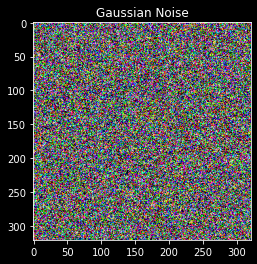

In [235]:
plt.imshow(Gaussian_noise)
plt.title('Gaussian Noise')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Salt and Pepper Noise')

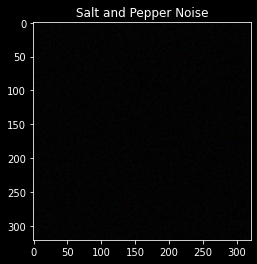

In [236]:
plt.imshow(Salt_and_pepper_noise)
plt.title('Salt and Pepper Noise')

In [237]:
noises = [Gaussian_noise, Salt_and_pepper_noise]

In [238]:
# Load training images and resize them to 321x321
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (321, 321))
        if img is not None:
            images.append(img)
    return images

path = "BSDS300\\images\\train"
images = load_images(path)
images = np.array(images)

### Part c)

In [243]:
degraded_images = []

for i in range(len(images)):
    img = np.float32(images[i])
    for _ in range(5):
        # Randomly select a blur function index
        blur_index = np.random.randint(0, len(blurs))
        random_blur_kernel = np.random.choice(kernel_sizes)

        if blur_index == 0:
            img = blurs[0](img, (random_blur_kernel, random_blur_kernel))
        elif blur_index == 1:
            img = blurs[1](img, ksize = (random_blur_kernel, random_blur_kernel), sigmaX = W)

        # Randomly select a noise function index from 0 or 1
        noise_func = noises[np.random.randint(0, 2)]
        
        # Add noise to the blurred image
        img = img + noise_func
    
    
    img = np.clip(img, 0, 255).astype(np.uint8)   # Clip and convert to uint8
    
    # Add the blurred and noisy image to the list of degraded images
    degraded_images.append(img)


### Visulaization of the degraded images

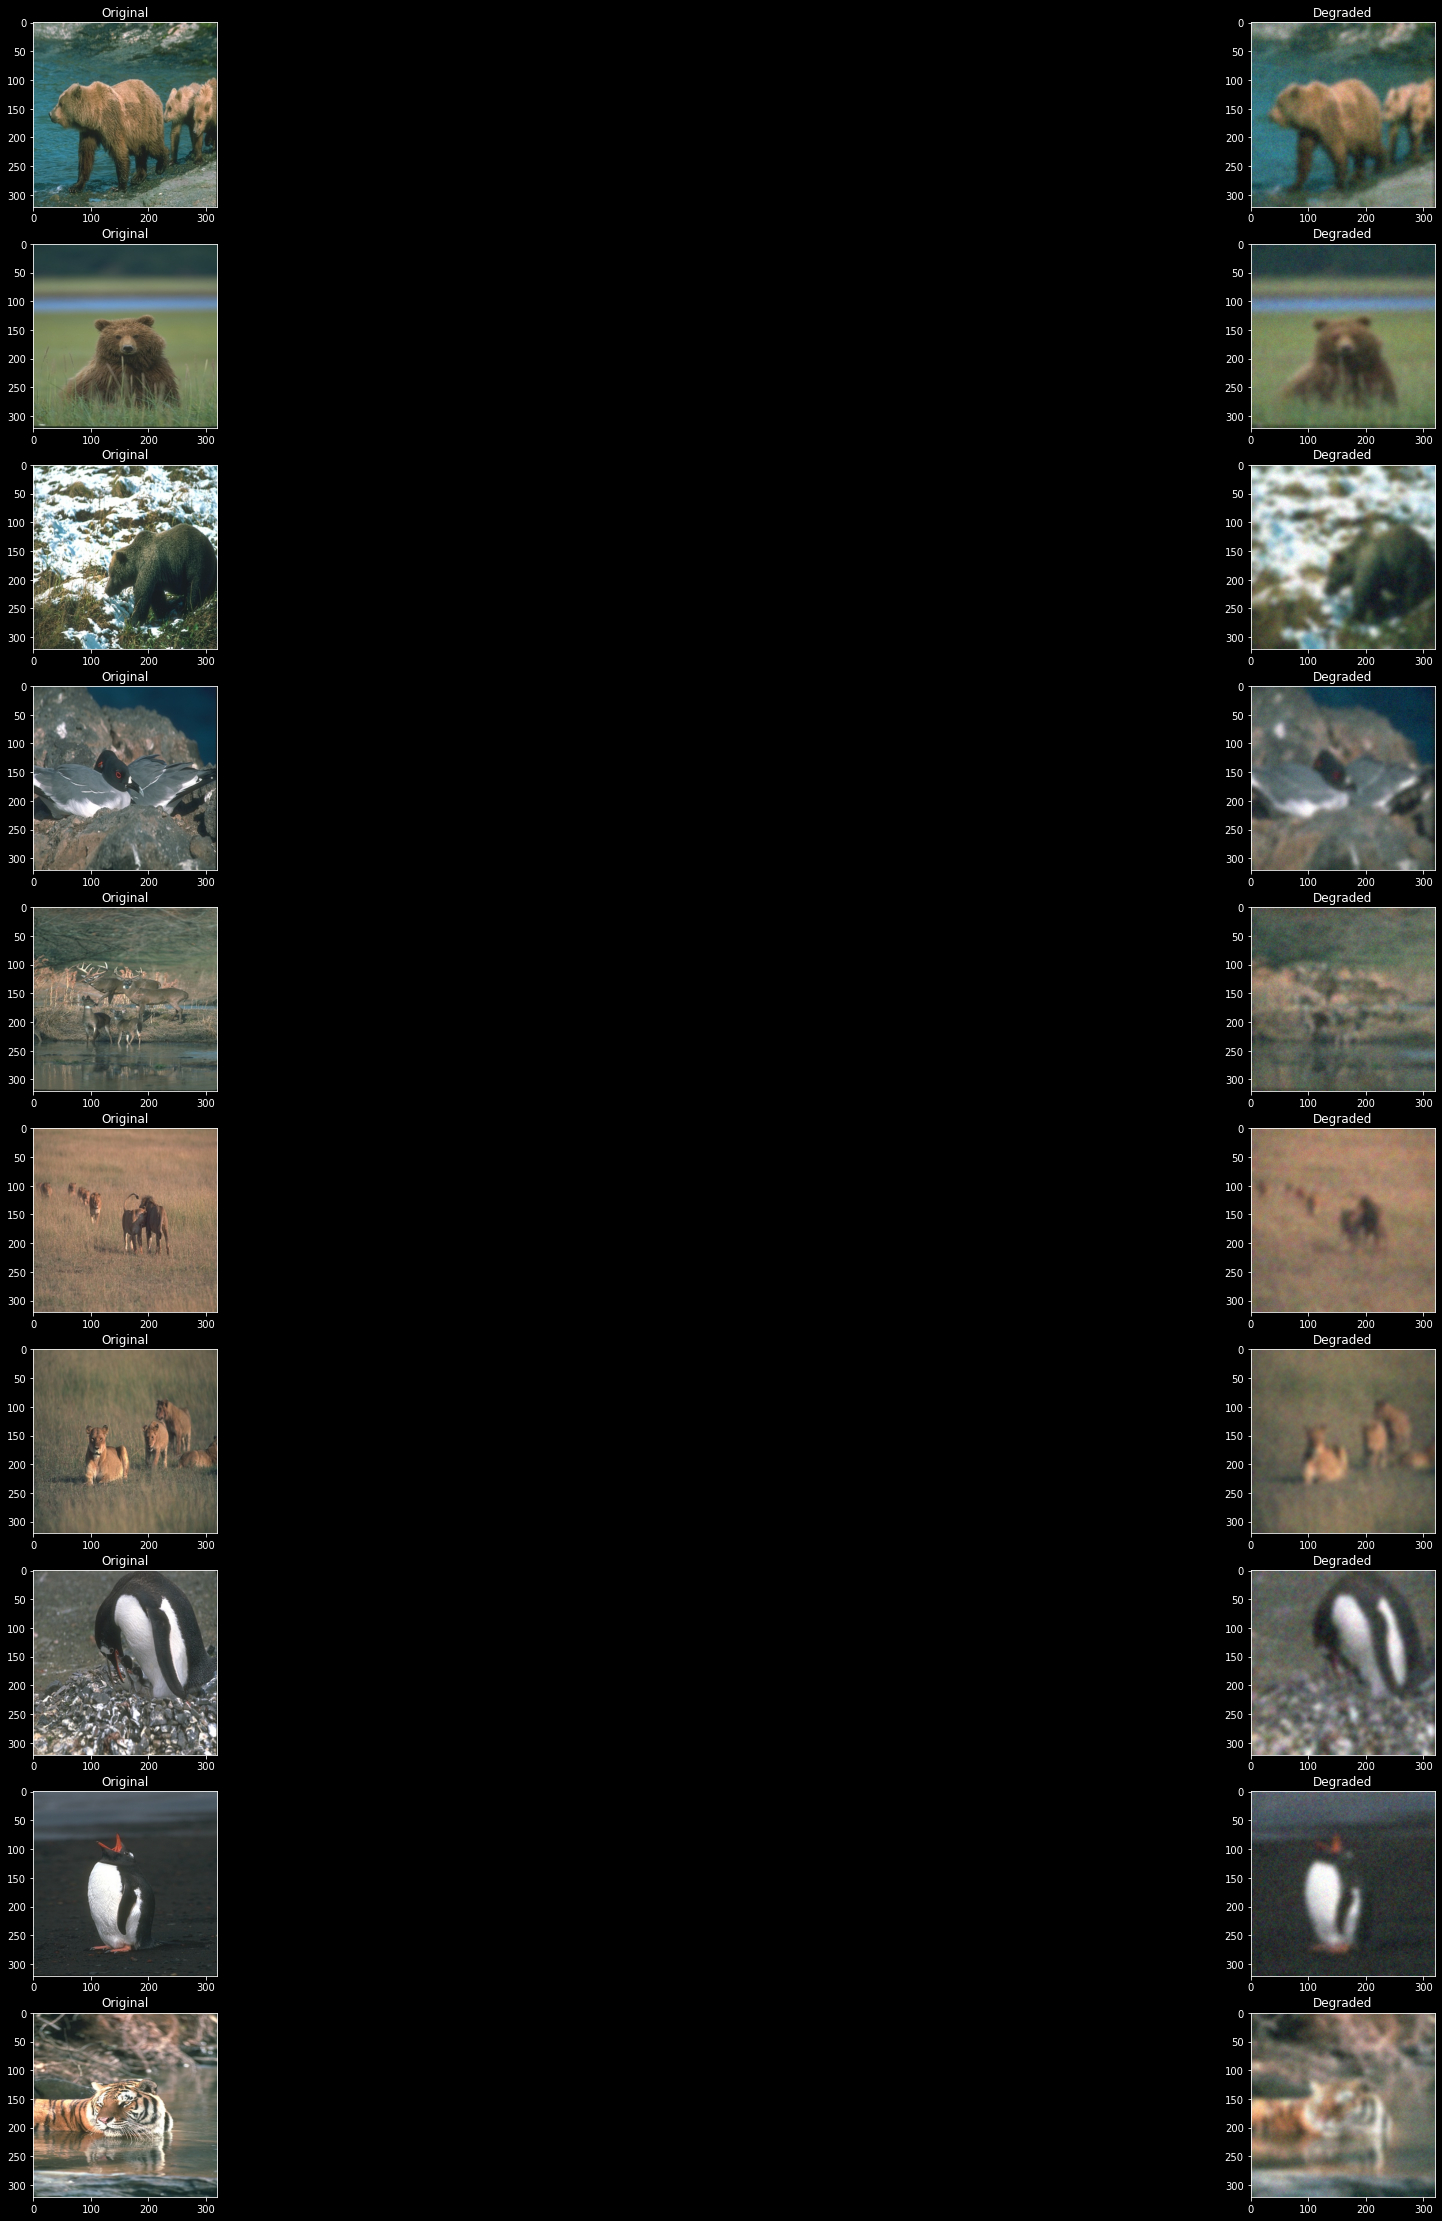

In [244]:
# Display the first 10 degraded images along with their original images
plt.figure(figsize=(40,40))
for i in range(10):
    plt.subplot(10,2,2*i+1)
    plt.imshow(images[i])
    plt.title('Original')
    plt.subplot(10,2,2*i+2)
    plt.imshow(degraded_images[i])
    plt.title('Degraded')
    

### Zoomed in on the following images to see the degradation.

Text(0.5, 1.0, 'Original')

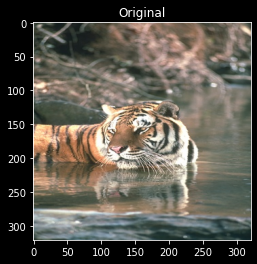

In [245]:
plt.imshow(images[9])
plt.title('Original')


Text(0.5, 1.0, 'Degraded')

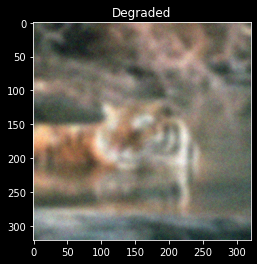

In [246]:
plt.imshow(degraded_images[9])
plt.title('Degraded')

In [103]:
image = images[8]
np.max(image)

255

In [104]:
image_d = image + Salt_and_pepper_noise
image_d = np.clip(image_d, 0, 255).astype(np.uint8)
np.max(image_d)

255

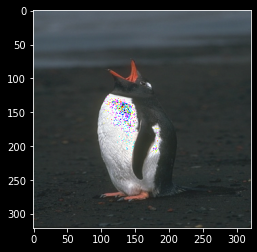

In [102]:
plt.imshow(image_d)

### Hence, we can see that there is a clear degradation in the images.

### Extracting patches from the degraded images of size W = 13

In [14]:
## Extracting k random patches from the degraded images of size (W,W) and getting the central pixel of the patch from the original image for an image index

def get_random_patches(img_index, W, k):
    """ Function to get k random patches from the degraded images of size (W,W) and getting the central pixel of the patch from the original image for an image index

    Args:
        img_index (int): Index of the image from which the patches are to be extracted
        W (int): Width of the patch
        k (int): Number of patches to be extracted

    Returns:
        ndarray: Array of shape (k, W, W, 3) containing the k patches
    """
    patches = []
    central_pixels = []

    for i in range(0, img.shape[0] - W, W):
        for j in range(0, img.shape[1] - W, W):
            patch = degraded_images[img_index][i:i+W, j:j+W, :]
            patches.append(patch)
            central_pixels.append(images[img_index][i+W//2, j+W//2, :])


    # k random number from 1 to patches.shape[0]
    random_indices = np.random.randint(0, len(patches), k)

    # Randomly select k patches from the list of patches
    random_patches = [patches[i] for i in random_indices]
    random_central_pixels = [central_pixels[i] for i in random_indices]
    
    random_patches = np.array(random_patches)
    random_central_pixels = np.array(random_central_pixels)
    random_central_pixels = random_central_pixels.reshape(k,1,1,3)

    return random_patches, random_central_pixels

### Visualizing one of the patches and the corresponding center of the patch

In [15]:
patch, pixel =  get_random_patches(0, W, 10)

Text(0.5, 1.0, 'Random Patch')

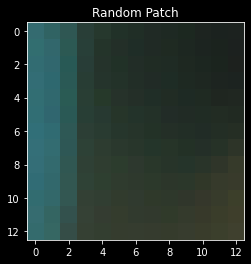

In [16]:
plt.imshow(patch[9])
plt.title('Random Patch')

Text(0.5, 1.0, 'Central Pixel of original image')

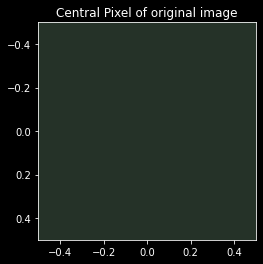

In [17]:
plt.imshow(pixel[9])
plt.title('Central Pixel of original image')

### Making patches of size W = 13 from the degraded images and the corresponding center of the patch

In [18]:
k = 50

In [19]:
patches = []
central_pixels = []

for i in range(len(degraded_images)):
    patch, pixel = get_random_patches(i, W, k)
    patches.append(patch)
    central_pixels.append(pixel)

patches = np.array(patches)
central_pixels = np.array(central_pixels)

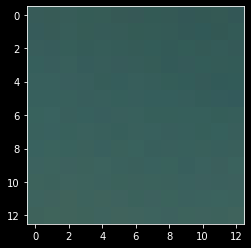

In [20]:
plt.imshow(patches[0][0])

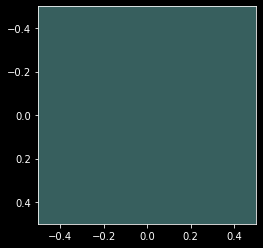

In [21]:
plt.imshow(central_pixels[0][0])

In [22]:
patches.shape

(200, 50, 13, 13, 3)

## Question 3

### Part a) We select w = 11

In [35]:
w = 7

### Part b) We use random forest regression to train the model

### Part c) 

In [36]:
## Function to read wxw patches from the degraded images and get the central pixel of the patch from the original image for an image index

def get_small_patches(patch,W, w):
    return patch[(W-w)//2:(W-w)//2+w, (W-w)//2:(W-w)//2+w, :]


### Visualizing a small patch of the degraded image

In [37]:
small_patch =  get_small_patches(patches[0][0], W, w)

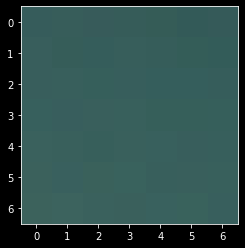

In [38]:
plt.imshow(small_patch)

In [39]:
## Get small_patches for all the patches

small_patches = []

for i in range(len(patches)):
    small_patch = []
    for j in range(len(patches[i])):
        small_patch.append(get_small_patches(patches[i][j], W, w))
    small_patches.append(small_patch)

small_patches = np.array(small_patches)
    

In [40]:
small_patches.shape

(200, 50, 7, 7, 3)

In [41]:
# Reshaping the small_patches and central_pixels 
small_patches = small_patches.reshape(200*k, w, w, 3)
central_pixels = central_pixels.reshape(200*k, 1, 1, 3)

In [42]:
# Shapes of the small_patches and central_pixels
print(small_patches.shape, central_pixels.shape)

(10000, 7, 7, 3) (10000, 1, 1, 3)


### Normalizing the small_patches channel-wise

In [43]:
normalized_small_patches = []

for i in range(200*k):
    patch = small_patches[i]
    R = patch[:,:,0]
    G = patch[:,:,1]
    B = patch[:,:,2]

    # Calculate the mean of the R, G, B channels
    R_mean = np.mean(R)
    G_mean = np.mean(G)
    B_mean = np.mean(B)

    # Calculate the standard deviation of the R, G, B channels
    R_std = np.std(R)
    G_std = np.std(G)
    B_std = np.std(B)

    # Normalize the R, G, B channels
    R_norm = (R - R_mean) / R_std
    G_norm = (G - G_mean) / G_std
    B_norm = (B - B_mean) / B_std

    # Concatenate the normalized R, G, B channels
    norm_patch = np.concatenate((R_norm[:,:,np.newaxis], G_norm[:,:,np.newaxis], B_norm[:,:,np.newaxis]), axis=2)

    normalized_small_patches.append(norm_patch)

normalized_small_patches = np.array(normalized_small_patches)

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


### Normalizing the center_patch 

In [44]:
central_pixels_norm = central_pixels/255

In [45]:
## Flatten the normalized_small_patches and central_pixels_norm before passing them through the network

normalized_small_patches = normalized_small_patches.reshape(200*k, w*w*3)
central_pixels_norm = central_pixels_norm.reshape(200*k, 3)

In [46]:
## Now we train a random forest regression model to predict the central pixel of the patch from the small_patches

from sklearn.ensemble import RandomForestRegressor

Regressor = RandomForestRegressor(n_estimators=100, random_state=0)

Regressor.fit(normalized_small_patches, central_pixels_norm)

# The MSE of the model
print(Regressor.score(normalized_small_patches, central_pixels_norm))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
temp = Regressor.predict(normalized_small_patches[0:1])

In [ ]:
temp.shape

(1, 3)

In [ ]:
temp = temp*255
temp = temp.reshape(1,1,3)
temp = temp.astype(np.uint8)

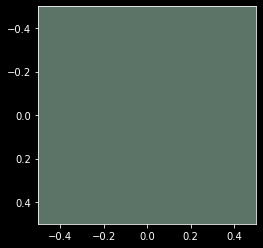

In [ ]:
plt.imshow(temp)

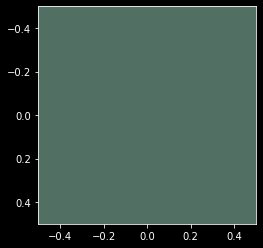

In [ ]:
plt.imshow(central_pixels[0])

In [ ]:
# Reconstruct the image from the small_patches and the predicted central pixel

img = degraded_images[0]

reconstruct_image = np.zeros((img.shape[0]-w, img.shape[1]-w, 3))
for x in range(0, img.shape[0] - w):
    vertical_patch = []
    for y in range(0, img.shape[1] - w):
        print("x = ", str(x), "y = ", str(y))
        patch = img[x:x+w, y:y+w, :]
        # Normalize the patch
        R = patch[:,:,0]
        G = patch[:,:,1]
        B = patch[:,:,2]

        # Calculate the mean of the R, G, B channels
        R_mean = np.mean(R)
        G_mean = np.mean(G)
        B_mean = np.mean(B)

        # Calculate the standard deviation of the R, G, B channels
        R_std = np.std(R)
        G_std = np.std(G)
        B_std = np.std(B)

        # Normalize the R, G, B channels
        R_norm = (R - R_mean) / R_std
        G_norm = (G - G_mean) / G_std
        B_norm = (B - B_mean) / B_std

        # Concatenate the normalized R, G, B channels
        norm_patch = np.concatenate((R_norm[:,:,np.newaxis], G_norm[:,:,np.newaxis], B_norm[:,:,np.newaxis]), axis=2)

        # Concatanate the normalized patch to the vertical_patch
        vertical_patch.append(norm_patch)

    vertical_patch = np.array(vertical_patch)
    # Predict the central pixel of the patch
    central_pixel = Regressor.predict(vertical_patch.reshape(-1, w*w*3))

    # Concatanate the vertical_patch to the reconstruct_image
    reconstruct_image[x,:,:] = central_pixel

reconstruct_image = reconstruct_image*255
reconstruct_image = reconstruct_image.astype(np.uint8)


x =  0 y =  0
x =  0 y =  1
x =  0 y =  2
x =  0 y =  3
x =  0 y =  4
x =  0 y =  5
x =  0 y =  6
x =  0 y =  7
x =  0 y =  8
x =  0 y =  9
x =  0 y =  10
x =  0 y =  11
x =  0 y =  12
x =  0 y =  13
x =  0 y =  14
x =  0 y =  15
x =  0 y =  16
x =  0 y =  17
x =  0 y =  18
x =  0 y =  19
x =  0 y =  20
x =  0 y =  21
x =  0 y =  22
x =  0 y =  23
x =  0 y =  24
x =  0 y =  25
x =  0 y =  26
x =  0 y =  27
x =  0 y =  28
x =  0 y =  29
x =  0 y =  30
x =  0 y =  31
x =  0 y =  32
x =  0 y =  33
x =  0 y =  34
x =  0 y =  35
x =  0 y =  36
x =  0 y =  37
x =  0 y =  38
x =  0 y =  39
x =  0 y =  40
x =  0 y =  41
x =  0 y =  42
x =  0 y =  43
x =  0 y =  44
x =  0 y =  45
x =  0 y =  46
x =  0 y =  47
x =  0 y =  48
x =  0 y =  49
x =  0 y =  50
x =  0 y =  51
x =  0 y =  52
x =  0 y =  53
x =  0 y =  54
x =  0 y =  55
x =  0 y =  56
x =  0 y =  57
x =  0 y =  58
x =  0 y =  59
x =  0 y =  60
x =  0 y =  61
x =  0 y =  62
x =  0 y =  63
x =  0 y =  64
x =  0 y =  65
x =  0 y =  66
x =  

In [ ]:
reconstruct_image = reconstruct_image*255
reconstruct_image = reconstruct_image.astype(np.uint8)

In [ ]:
reconstruct_image

array([[[124, 123, 103],
        [113, 115,  99],
        [ 93, 100,  83],
        ...,
        [109, 110,  87],
        [114, 114,  94],
        [107, 105,  85]],

       [[120, 121, 103],
        [103, 105,  88],
        [ 94,  96,  79],
        ...,
        [117, 118,  94],
        [118, 119,  95],
        [104, 104,  83]],

       [[138, 138, 120],
        [115, 117, 101],
        [125, 120, 102],
        ...,
        [112, 113,  96],
        [123, 118,  93],
        [102, 103,  85]],

       ...,

       [[ 95, 101,  82],
        [121, 120, 102],
        [ 99, 102,  85],
        ...,
        [ 99,  98,  76],
        [111, 110,  85],
        [115, 114,  94]],

       [[ 99,  98,  80],
        [ 93,  96,  75],
        [101, 104,  83],
        ...,
        [123, 121,  94],
        [116, 115,  92],
        [ 98, 100,  78]],

       [[ 98, 100,  82],
        [141, 139, 117],
        [128, 129, 110],
        ...,
        [116, 114,  91],
        [123, 120,  95],
        [ 95,  96,  73]]

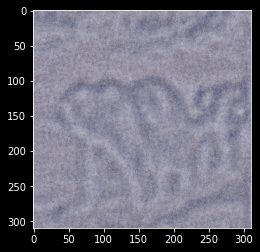

In [ ]:
plt.imshow(reconstruct_image)

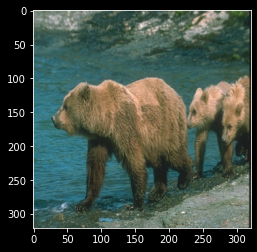

In [ ]:
plt.imshow(images[0])

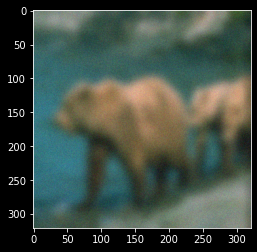

In [ ]:
plt.imshow(degraded_images[0])